# Code for visualisations in report

##  1. Install packages and notes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For all of the code below - any part where there is a RED coloured text needs to be changed to the pathname where the code is saved on YOUR computer. 
"/Users/kaitlinjohnson/Desktop/" this part is unique - so you only really need to change this bit if you would like to replicate the code.

## 2. Visualisations

### Section 1: Macro perspective of luxury goods during Covid for the USA

#### 2.1.1 Create luxury good dataframe and clean data for graph

In [2]:
# Read full luxury goods dataset with various measures included from 2018-2029 (predictions)
df_luxgoods_US = pd.read_csv('/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/lux_goods_US_revenue.csv', skiprows=1)
df_luxgoods_US.head()

,Region,Market,Chart,Name,Unit,Source,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,United States,Luxury Leather Goods,Revenue,Total,USD (US$),Statista Market Insights,"11,060,532,359.955","12,130,107,426.044","10,146,228,676.659","11,754,440,260.56","12,558,846,898.03","14,828,605,751.052","16,186,759,446.429","17,863,829,316.985","19,524,128,488.837","21,167,824,668.969","22,795,083,887.3","24,406,070,513.448"
1,United States,Luxury Leather Goods,Revenue Change,Total,percent,Statista Market Insights,0,0.097,-0.164,0.159,0.068,0.181,0.092,0.104,0.093,0.084,0.077,0.071
2,United States,Luxury Leather Goods,Average Revenue per Capita,Total,USD (US$),Statista Market Insights,33.301,36.283,30.202,34.88,37.125,43.614,47.355,51.99,56.532,60.985,65.352,69.633
3,United States,Luxury Leather Goods,Company Shares,LVMH,percent,Statista Market Insights,0,0,0,0,0,0.418,0,0,0,0,0,0
4,United States,Luxury Leather Goods,Company Shares,Tapestry,percent,Statista Market Insights,0,0,0,0,0,0.12,0,0,0,0,0,0


In [3]:
# The dataframe above includes cosmetics, skincare and fragrances combined
# This project needs these to be split 
# Import data separately for each category from a different dataset
df_luxcosfrag_US_full = pd.read_csv('/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/US_cos_frag_skin.csv')

# Filter to get rid of the "total" (cos + skin + frag) row (not needed for graph)
df_luxcosfrag_US = df_luxcosfrag_US_full.iloc[1:4]

# Rename in preparation for merge 
df_luxcosfrag_US = df_luxcosfrag_US.rename(columns={'Unnamed: 0' : 'Market'})

# Filter for covid dates - too many years would be too clutered.
# 2019 = pre-pandemic (base level), 2020 = during pandemic change, and 2021 = rebound
df_luxcosfrag_US = df_luxcosfrag_US.drop(columns=['2018', '2022', '2023', '2024', '2025','2026','2027','2028','2029'])
df_luxcosfrag_US[['2019','2020','2021']] = df_luxcosfrag_US[['2019','2020','2021']]*1000000000

# Print dataframe
df_luxcosfrag_US

,Market,2019,2020,2021
1,Prestige Skin Care,3.620000e+09,3.110000e+09,3.330000e+09
2,Prestige Fragrances,3.570000e+09,2.900000e+09,3.140000e+09
3,Prestige Cosmetics,3.940000e+09,3.450000e+09,3.730000e+09


In [4]:
# Filter the dataframe for just Revenue (not interested in other measures)
df_luxgoods_US_filtered = df_luxgoods_US[df_luxgoods_US["Chart"] == "Revenue"]

# Filter for only total revenue of USA (not interested in other countries/brands)
df_luxgoods_US_filtered = df_luxgoods_US_filtered[df_luxgoods_US_filtered["Name"]=="Total"]

# Drop all other columns to create same format as above
df_luxgoods_US_filtered = df_luxgoods_US_filtered.drop(columns=['Region', 'Chart', 'Name', 'Unit', 'Source', '2018', '2022', '2023', '2024', '2025','2026','2027','2028','2029'])
df_luxgoods_US_filtered

,Market,2019,2020,2021
0,Luxury Leather Goods,"12,130,107,426.044","10,146,228,676.659","11,754,440,260.56"
171,Luxury Watches & Jewelry,"17,786,008,870.76","14,661,407,923.848","16,442,476,032.358"
345,Luxury Fashion,"30,993,996,120.716","27,713,460,330.501","28,734,741,926.935"
518,Luxury Eyewear,"9,600,588,003.752","7,928,284,844.069","8,449,274,267.786"
679,Prestige Cosmetics & Fragrances,"11,128,087,085.608","9,460,812,647.317","10,198,173,508.067"


In [5]:
# Merge the two dataframes using concat as they are in the same format
merged_market_df = pd.concat([df_luxcosfrag_US, df_luxgoods_US_filtered], ignore_index=True)

# Drop the joint cos frag skin row as we have separated them now
merged_market_df = merged_market_df.drop(7)
merged_market_df.head()

,Market,2019,2020,2021
0,Prestige Skin Care,3620000000.0,3110000000.0,3330000000.0
1,Prestige Fragrances,3570000000.0,2900000000.0,3140000000.0
2,Prestige Cosmetics,3940000000.0,3450000000.0,3730000000.0
3,Luxury Leather Goods,"12,130,107,426.044","10,146,228,676.659","11,754,440,260.56"
4,Luxury Watches & Jewelry,"17,786,008,870.76","14,661,407,923.848","16,442,476,032.358"


#### 2.1.2 Code visualisation for luxury goods before, during and after covid-19 

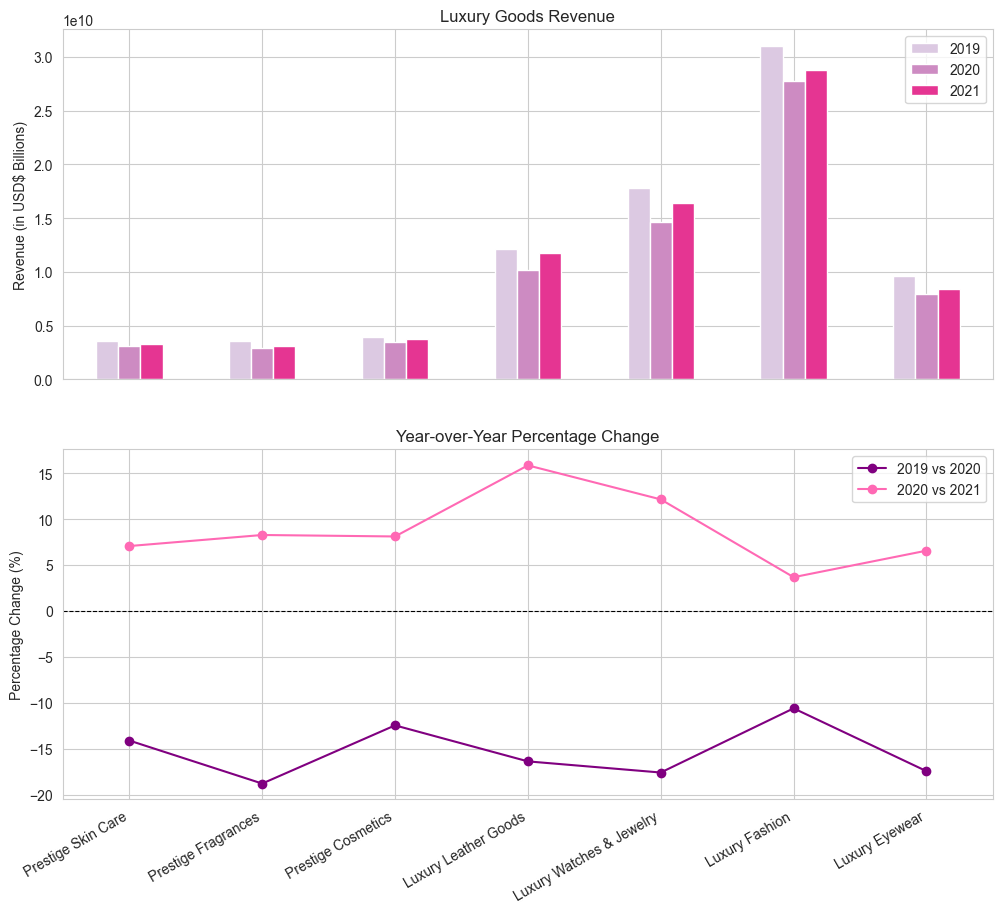

In [6]:
# Selected colour scheme for project - pinks and purples fit the theme 
colors = sns.color_palette("PuRd", n_colors=4)
sns.set_palette(colors)

# Added grid as it made it easier to read
sns.set_style("whitegrid")

# Get rid of , in numbers to get in right format for graph
for year in ['2019', '2020', '2021']:
    merged_market_df[year] = merged_market_df[year].replace({',': ''}, regex=True).astype(float)

# Calculate percentage change in revenue
merged_market_df['Change 2019-2020'] = (merged_market_df['2020'] - merged_market_df['2019']) / merged_market_df['2019'] * 100
merged_market_df['Change 2020-2021'] = (merged_market_df['2021'] - merged_market_df['2020']) / merged_market_df['2020'] * 100

# Create the axis to plot two graphs 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot bar chart on axis one and add labels
merged_market_df.set_index('Market')[['2019', '2020', '2021']].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Revenue (in USD$ Billions)')
ax1.set_title('Luxury Goods Revenue')

# Plot line graph showing percentage change
ax2.plot(merged_market_df['Market'], merged_market_df['Change 2019-2020'], label='2019 vs 2020', marker='o', color='purple')
ax2.plot(merged_market_df['Market'], merged_market_df['Change 2020-2021'], label='2020 vs 2021', marker='o', color='hotpink')
ax2.set_ylabel('Percentage Change (%)')
ax2.set_title('Year-over-Year Percentage Change')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax2.legend()

# Rotate labels to read and show
plt.xticks(rotation=30, ha='right')
plt.show()

### Section 2: Cosmetics and the lipstick index during covid in the USA

#### 2.2.1 Create luxury cosmetic dataframe separated by category and clean

In [7]:
# Load dataset for luxury cosmetics revenue split by product
df_luxcos_segments = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/segmented_luxcos_revenue.csv")

# Filter for only recorded years (not predictions)
df_luxcos_segments_filtered = df_luxcos_segments[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]

# Get rid of total
df_luxcos_segments_filtered = df_luxcos_segments_filtered.iloc[1:4]

# Rename columns
df_luxcos_segments_filtered = df_luxcos_segments_filtered.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
df_luxcos_segments_filtered

,Cosmetic_product,2018,2019,2020,2021,2022,2023,2024
1,Prestige Eyes Cosmetics,0.81,0.82,1.01,0.96,0.83,0.84,0.89
2,Prestige Face Cosmetics,2.06,2.18,1.86,2.10,2.38,2.42,2.54
3,Prestige Lips Cosmetics,0.89,0.94,0.59,0.67,0.96,0.97,1.02


In [8]:
# reset index and show table
df_luxcos_segments_filtered.set_index('Cosmetic_product', inplace=True)
df_luxcos_segments_filtered

,2018,2019,2020,2021,2022,2023,2024
Cosmetic_product,,,,,,,
Prestige Eyes Cosmetics,0.81,0.82,1.01,0.96,0.83,0.84,0.89
Prestige Face Cosmetics,2.06,2.18,1.86,2.10,2.38,2.42,2.54
Prestige Lips Cosmetics,0.89,0.94,0.59,0.67,0.96,0.97,1.02


#### 2.2.2 Create line graph for prestige eyes, lips and face over time

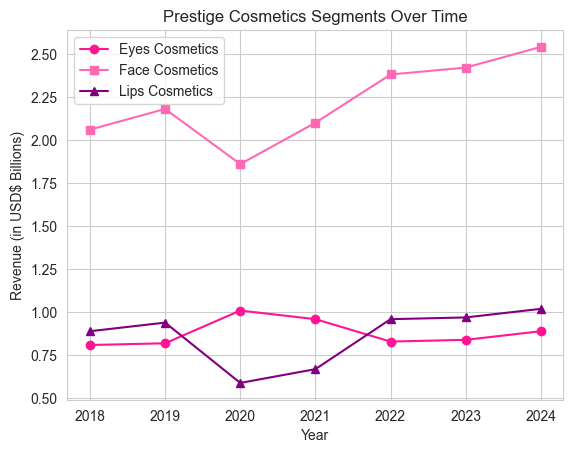

In [9]:
# Create plot for each product type
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Eyes Cosmetics'], label='Eyes Cosmetics', color='deeppink', marker='o')
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Face Cosmetics'], label='Face Cosmetics', color='hotpink', marker='s')
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Lips Cosmetics'], label='Lips Cosmetics', color='purple', marker='^')

# Add legend and labels
plt.legend()
plt.title('Prestige Cosmetics Segments Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (in USD$ Billions)')
plt.grid(True)

# Show plot
plt.show()

#### 2.2.3 Dataframe and clean for prestige cosmetics and overall US cosmetics

In [10]:
# Create a dataset for the revenue of prestige comsetics in US 

# Use same dataset created for visualisation 1
df_luxcosfrag_US_full

# Filter for just prestige cosmetcis
df_prestige_cosmetics = df_luxcosfrag_US_full[df_luxcosfrag_US_full["Unnamed: 0"] == "Prestige Cosmetics"]
df_prestige_cosmetics = df_prestige_cosmetics.drop(columns=['Unnamed: 0'])

# Reshape and reset index
dft_prestige_cosmetics = df_prestige_cosmetics.transpose()
dft_prestige_cosmetics.reset_index(inplace=True)

# Rename columns
dft_prestige_cosmetics.columns = ['Year', 'Prestige Cosmetics Revenue']

# Show dataframe
dft_prestige_cosmetics.head()

,Year,Prestige Cosmetics Revenue
0,2018,3.76
1,2019,3.94
2,2020,3.45
3,2021,3.73
4,2022,4.16


In [11]:
# Dataframe for the total cosmetic market revenue  in the US

# Read in dataset
df_cosmetics_market = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/cosmetic_revenue_US.csv")
df_cosmetics_market.head()

,Revenue of the cosmetics industry in the U.S. 2019-2030,Unnamed: 1
0,Revenue of the cosmetics market in the United ...,NaN
1,NaN,NaN
2,2019,17.03
3,2020,13.64
4,2021,14.77


In [12]:
# Rename columns
df_cosmetics_market = df_cosmetics_market.rename(columns={'Unnamed: 1' : 'Revenue mass market', 'Revenue of the cosmetics industry in the U.S. 2019-2030' : 'Year'})

# Skip the 2 NaN value rows
df_cosmetics_market = df_cosmetics_market.iloc[2:]

# Show dataframe
df_cosmetics_market.head()

,Year,Revenue mass market
2,2019,17.03
3,2020,13.64
4,2021,14.77
5,2022,18.01
6,2023,19.43


In [13]:
# Merge the revenue of the mass market and the prestige market
merged_cos_df = pd.merge(df_cosmetics_market, dft_prestige_cosmetics, on="Year", how="inner")

# Convert to integer
merged_cos_df["Year"] = merged_cos_df["Year"].astype(int)

# Filter for 2019-2023
merged_cos_df = merged_cos_df[merged_cos_df["Year"] < 2024]

# Show dataframe
merged_cos_df.head()

,Year,Revenue mass market,Prestige Cosmetics Revenue
0,2019,17.03,3.94
1,2020,13.64,3.45
2,2021,14.77,3.73
3,2022,18.01,4.16
4,2023,19.43,4.24


#### 2.2.4 Indexed graph for prestige cosmetics and cosmetics market overall

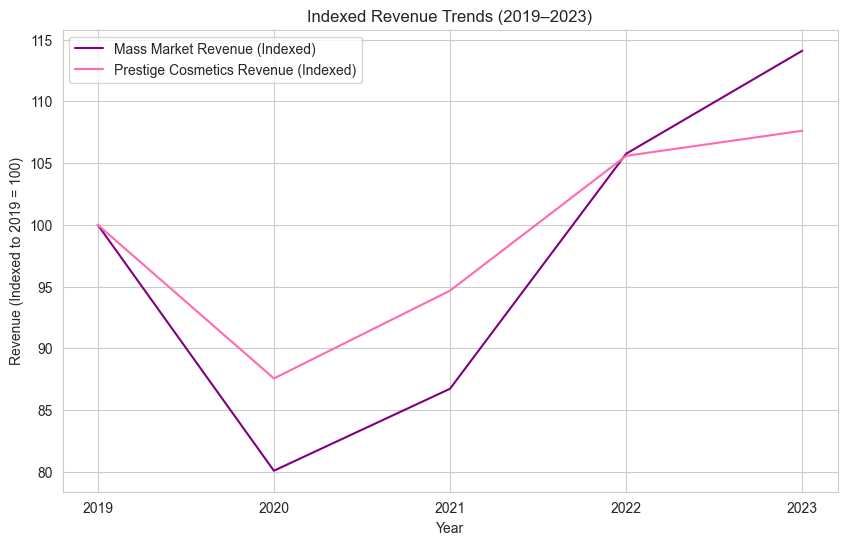

In [14]:
# Create copy of the above dataframe incase of mistakes
df_indexed = merged_cos_df.copy()

# Create in index where the first row (2019) is the baseline of 100, each value divided by this x 100
df_indexed['Revenue mass market'] = merged_cos_df['Revenue mass market'] / merged_cos_df['Revenue mass market'].iloc[0] * 100
df_indexed['Prestige Cosmetics Revenue'] = merged_cos_df['Prestige Cosmetics Revenue'] / merged_cos_df['Prestige Cosmetics Revenue'].iloc[0] * 100

# Create figure for indexed graph
plt.figure(figsize=(10, 6))

# Plot line for each (mass and prestige) using year and indexed values
plt.plot(merged_cos_df['Year'], df_indexed['Revenue mass market'], label='Mass Market Revenue (Indexed)', color="purple")
plt.plot(merged_cos_df['Year'], df_indexed['Prestige Cosmetics Revenue'], label='Prestige Cosmetics Revenue (Indexed)', color="hotpink")

# Add labels and legends
plt.xticks(merged_cos_df["Year"])
plt.xlabel('Year')
plt.ylabel('Revenue (Indexed to 2019 = 100)')
plt.title('Indexed Revenue Trends (2019–2023)')
plt.legend()
plt.grid(True)

# Show graph
plt.show()


## 3. Advanced modelling analysis 

This section is really long. I was going to separate the code into two with this part separate, however there is a lot of overlap with various dataframes run from above. To make sure this works - ensure everything above is run successfully to use the dataframes from previous parts. I begin with the USA. Initially, I attempted to advance model with just prestige cosmetics from the USA. I quickly realised this was not enough data. As a result, I used data from UK, Japan, China and Germany - the other largest consumers of luxury goods worldwide. A lot of the formatting for each of the countries is very similar so may not be worth reading through every part as there will be repetition. Most the data collected was already in US dollars, netherless some exchange rates may have been added in the code if it was not in the correct currency. 

### 3.1 Data cleaning for the USA

#### 3.1.1 USA Revenue column

In [15]:
# USA revenue
#  Create the USA dataframe - starting with revenue column
df_USA = df_luxcos_segments_filtered.copy()

# Reset the index and check the column names
df_USA.reset_index(inplace=True)

# Melt the DataFrame, using 'Cosmetic_product' as the id variable
df_USA = df_USA.melt(id_vars=['Cosmetic_product'], var_name='Year', value_name='Revenue')

# Revenue in billions and year converted
df_USA['Revenue'] = df_USA['Revenue']* 1000000000
df_USA ['Year']= df_USA['Year'].astype(int)

# Show dataframe
df_USA.head()

,Cosmetic_product,Year,Revenue
0,Prestige Eyes Cosmetics,2018,8.100000e+08
1,Prestige Face Cosmetics,2018,2.060000e+09
2,Prestige Lips Cosmetics,2018,8.900000e+08
3,Prestige Eyes Cosmetics,2019,8.200000e+08
4,Prestige Face Cosmetics,2019,2.180000e+09


#### 3.1.2 USA GDP column

In [16]:
# Import USA GDP dataset
GDP_data = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/Global_GDP.csv", skiprows=4)
GDP_data

# Reshape and index to get just countries and data
GDP_data.columns = GDP_data.loc[0]  
GDP_data = GDP_data.drop(index=0)  
GDP_data = GDP_data.reset_index(drop=True)

# Drop columns so it is just country name and years
GDP_data_cleaned = GDP_data.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'])

# Melt the data to long format, keeping 'Country Name' and 'GDP' for each year
GDP_data_long = GDP_data_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')

# Convert the Year column to integer and GDP to numeric
GDP_data_long['Year'] = GDP_data_long['Year'].astype(float)
GDP_data_long['GDP'] = pd.to_numeric(GDP_data_long['GDP'], errors='coerce')

# Drop rows where GDP is NaN
GDP_data_long = GDP_data_long.dropna(subset=['GDP'])

# Filter for the USA and years 2018-2022
USA_data = GDP_data_long[(GDP_data_long['Country Name'] == 'United States')&
                          (GDP_data_long['Year'] >= 2018) & 
                          (GDP_data_long['Year'] <= 2023)]

USA_data['Year'] = USA_data['Year'].astype(int)
USA_data = USA_data.drop(columns=['Country Name'])

# Reset the index after filtering
USA_data = USA_data.reset_index(drop=True)
USA_data

/var/folders/tq/_jp_jlsx7g1_22mq8kmlfnxw0000gn/T/ipykernel_11682/833325064.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_data['Year'] = USA_data['Year'].astype(int)


,Year,GDP
0,2018,2.065652e+13
1,2019,2.153998e+13
2,2020,2.135410e+13
3,2021,2.368117e+13
4,2022,2.600689e+13
5,2023,2.772071e+13


#### 3.1.3 Consumer confidence USA column

In [17]:
# Import dataset on USA consumer confidence
consumer_confidence = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/consumer_sentiment_US.csv")
consumer_confidence

# Rename columns and drop NA
consumer_confidence.columns = ["Month", "CCI"]
consumer_confidence = consumer_confidence.dropna()

# Creat function to convert from format Jan '19 to 2019
def extract_year(month_str):
    year_suffix = month_str.split("'")[-1]
    return 2000 + int(year_suffix)

# Insert function to run through the month column and change all format
consumer_confidence['Year'] = consumer_confidence['Month'].apply(extract_year)
consumer_confidence

# Convert to numeric
consumer_confidence['CCI'] = pd.to_numeric(consumer_confidence['CCI'], errors='coerce')

# Reformat to get rid of the month column and create an annual average confidence level
cci_by_year = consumer_confidence.groupby('Year')['CCI'].mean().reset_index()
cci_by_year.columns = ['Year', 'Avg_Confidence']

# Show dataframe
cci_by_year.head()

,Year,Avg_Confidence
0,2019,101.251667
1,2020,99.486667
2,2021,99.056667
3,2022,96.884167
4,2023,97.620833


#### 3.1.4 Unemployment rate in USA column

In [18]:
# Import dataset on unemployment rate 
unemployment_rate = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/US_unemployment_rate.csv")

# Skip first two rows
unemployment_rate = unemployment_rate.iloc[2:]

# rename columns
unemployment_rate.columns = ['Year', 'Unemployment_rate', 'Unit']

# Drop column which has "in %" for every row
unemployment_rate.drop(columns=['Unit'], inplace=True)

# Convert year and convert from format '90 to 1990 etc.
unemployment_rate["Year"] = unemployment_rate["Year"].str.replace("'", "").astype(int)
unemployment_rate["Year"] = unemployment_rate["Year"].apply(lambda x: x + 2000 if x < 25 else x + 1900)

# Show dataframe
unemployment_rate.head()



,Year,Unemployment_rate
2,1990,5.6
3,1991,6.8
4,1992,7.5
5,1993,6.9
6,1994,6.1


#### 3.1.4 E-commerce by cosmetic product USA column

In [19]:
# Create column of online sales share for each prestige cosmetic product in the USA 

# LIPS 
# Read csv and melt into different shape
lips_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/lips_online_sales.csv")
lips_ecommerce = pd.melt(lips_ecommerce, id_vars=["Unnamed: 0"], var_name = "Year", value_name = "Online_revenue_percent")

# Filter for just the 'Online' rows and drop column
lips_online = lips_ecommerce[lips_ecommerce['Unnamed: 0'] == 'Online']
lips_online = lips_online.drop(columns=['Unnamed: 0'])

# Convert the 'Year' column to integers (ready for merge)
lips_online['Year'] = lips_online['Year'].astype(int)
lips_online

# EYES 
# Read csv and melt into different shape
eyes_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/eyes_ecommerce.csv")
eyes_ecommerce = pd.melt(eyes_ecommerce, id_vars=["Unnamed: 0"], var_name = "Year", value_name = "Online_revenue_percent")

# Filter for just the 'Online' rows and drop column
eyes_online = eyes_ecommerce[eyes_ecommerce['Unnamed: 0'] == 'Online']
eyes_online = eyes_online.drop(columns=['Unnamed: 0'])

# Convert the 'Year' column to integers (ready for merge)
eyes_online['Year'] = eyes_online['Year'].astype(int)
eyes_online

# FACE 
# Read csv and melt into different shape
face_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/face_ecommerce.csv")
face_ecommerce = pd.melt(face_ecommerce, id_vars=["Unnamed: 0"], var_name = "Year", value_name = "Online_revenue_percent")

# Filter for just the 'Online' rows and drop column
face_online = face_ecommerce[face_ecommerce['Unnamed: 0'] == 'Online']
face_online = face_online.drop(columns=['Unnamed: 0'])

# Convert the 'Year' column to integers (ready for merge)
face_online['Year'] = face_online['Year'].astype(int)
face_online


,Year,Online_revenue_percent
1,2018,0.7
3,2019,0.7
5,2020,1.0
7,2021,1.0
9,2022,0.9
11,2023,0.9
13,2024,0.8
15,2025,0.7
17,2026,0.6
19,2027,0.6


#### 3.1.5 Final USA dataframe

In [20]:
# Merge GDP, consumer confidence and unemployment rate
df_USA = pd.merge(df_USA, USA_data, on='Year', how="inner")
df_USA = pd.merge(df_USA, cci_by_year, on='Year', how="inner")
df_USA = pd.merge(df_USA, unemployment_rate, on='Year', how="inner")
df_USA.head()


,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate
0,Prestige Eyes Cosmetics,2019,8.200000e+08,2.153998e+13,101.251667,3.7
1,Prestige Face Cosmetics,2019,2.180000e+09,2.153998e+13,101.251667,3.7
2,Prestige Lips Cosmetics,2019,9.400000e+08,2.153998e+13,101.251667,3.7
3,Prestige Eyes Cosmetics,2020,1.010000e+09,2.135410e+13,99.486667,8.1
4,Prestige Face Cosmetics,2020,1.860000e+09,2.135410e+13,99.486667,8.1


In [21]:
# Filter the main DataFrame for each product type (Lips, Eyes, Face)
df_lips = df_USA[df_USA['Cosmetic_product'] == 'Prestige Lips Cosmetics']
df_eyes = df_USA[df_USA['Cosmetic_product'] == 'Prestige Eyes Cosmetics']
df_face = df_USA[df_USA['Cosmetic_product'] == 'Prestige Face Cosmetics']

# Merge online sales data for each product type
df_lips = pd.merge(df_lips, lips_online, on="Year", how="left")
df_eyes = pd.merge(df_eyes, eyes_online, on="Year", how="left")
df_face = pd.merge(df_face, face_online, on="Year", how="left")

# Rename the online sales column
df_lips = df_lips.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_eyes = df_eyes.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_face = df_face.rename(columns={'Online_revenue_percent': 'online_sales_%'})

In [22]:
# Merge again
df_USA = pd.concat([df_lips, df_eyes, df_face])

# Add column for USA
df_USA["Country"] = "USA"

# Show dataframe
df_USA.head()

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2019,940000000.0,2.153998e+13,101.251667,3.7,16.7,USA
1,Prestige Lips Cosmetics,2020,590000000.0,2.135410e+13,99.486667,8.1,31.5,USA
2,Prestige Lips Cosmetics,2021,670000000.0,2.368117e+13,99.056667,5.3,35.7,USA
3,Prestige Lips Cosmetics,2022,960000000.0,2.600689e+13,96.884167,3.6,29.5,USA
4,Prestige Lips Cosmetics,2023,970000000.0,2.772071e+13,97.620833,3.6,35.6,USA
